## Imports

In [273]:
import category_encoders as ce
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC

## Read the data

In [274]:
df = pd.read_csv('../data/Stars.csv')
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


## Do all the testing whether the data is ok

In [275]:
assert df.isnull().sum().sum() == 0

## Remove data we do not need
This time we keep the Spectral Classes

In [276]:
# df = df.drop(columns=['Color'], axis=1)

## Divide into X and Y

In [277]:
cols = df.columns.to_list()
y_var = cols.pop(cols.index('Type'))
x = df[cols]
y = df[y_var]

## One-Hot encode our spectral classes

In [278]:
encoder = ce.OneHotEncoder(cols=['Spectral_Class', 'Color'])
x_encoded = encoder.fit_transform(x)
x_encoded

,Temperature,L,R,A_M,Color_1,Color_2,Color_3,Color_4,Color_5,Color_6,...,Color_15,Color_16,Color_17,Spectral_Class_1,Spectral_Class_2,Spectral_Class_3,Spectral_Class_4,Spectral_Class_5,Spectral_Class_6,Spectral_Class_7
0,3068,0.002400,0.1700,16.12,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,3042,0.000500,0.1542,16.60,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2600,0.000300,0.1020,18.70,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2800,0.000200,0.1600,16.65,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1939,0.000138,0.1030,20.06,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
236,30839,834042.000000,1194.0000,-10.63,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
237,8829,537493.000000,1423.0000,-10.73,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [279]:
# or using pandas
pd_encoded_spectral = pd.get_dummies(x['Spectral_Class'])
pd_encoded_color = pd.get_dummies(x['Color'])
pd_encoded_df = pd.concat([x, pd_encoded_color, pd_encoded_spectral], axis=1)
pd_encoded_df = pd_encoded_df.drop(['Spectral_Class', 'Color'], axis=1)
pd_encoded_df

,Temperature,L,R,A_M,Blue,Blue White,Blue white,Blue-White,Blue-white,Orange,...,white,yellow-white,yellowish,A,B,F,G,K,M,O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Train Test Split

In [280]:
x_train, x_test, y_train, y_test = train_test_split(
    x_encoded.values,
    y.values,
    test_size=0.33,
    shuffle=True,
    random_state=42,
)

## Scale the data

In [281]:
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)

## Built simple SVM

In [282]:
svm_model = SVC(random_state=42)
svm_model.fit(X=x_train_scaled, y=y_train)

SVC(random_state=42)

## Print Confusion Matrix

c:\Users\kittnjdr\.conda\envs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


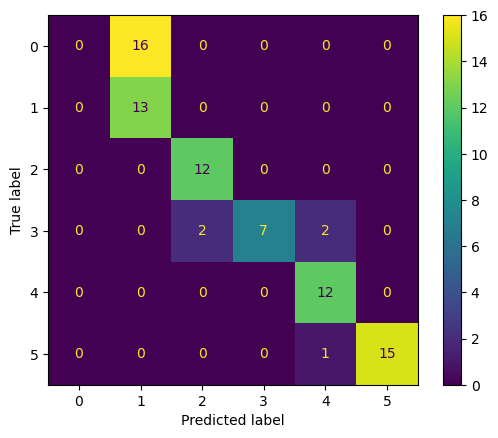

In [283]:
plot_confusion_matrix(svm_model, x_test_scaled, y_test)

***
# Extra:
## Test parameter combinations for our model

In [284]:
# create a dict with all parameters we want to test
param_grid = {
    'C': [0.5, 1, 10, 20, 40, 80, 160],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}
# test all combinations
optimal_params = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=4,
)
optimal_params.fit(x_train_scaled, y_train)
best_params = optimal_params.best_params_
print(best_params)

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


## Built custom  Model

In [285]:
svm_model = SVC(random_state=42, **best_params)
svm_model.fit(X=x_train_scaled, y=y_train)

SVC(C=10, kernel='linear', random_state=42)

## Print Confusion Matrix

c:\Users\kittnjdr\.conda\envs\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


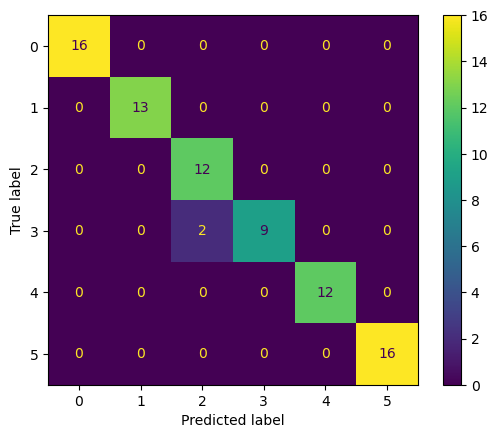

In [286]:
plot_confusion_matrix(svm_model, x_test_scaled, y_test)